In [ ]:
# python
import sys
from pathlib import Path
# Ensure the project root (containing requirements.txt/README.md) is on sys.path
root = Path.cwd()
while not (root / "requirements.txt").exists() and root != root.parent:
    root = root.parent
# Add project root to sys.path (use insert so it has precedence)
root_path = str(root.resolve())
if root_path not in sys.path:
    sys.path.insert(0, root_path)
# Also ensure the 'src' directory itself is available (helps some environments)
src_dir = root / "src"
if src_dir.is_dir():
    src_path = str(src_dir.resolve())
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
# Install project dependencies from requirements.txt (ensures hopsworks is installed)
!{sys.executable} -m pip install -r {root_path}/requirements.txt

from data_ingestion.fetch_openmeteo import fetch_openmeteo_data

df = fetch_openmeteo_data(
    start_date="2024-10-01",
    end_date="2025-01-01",
)

df.head(), df.shape


  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
Using cached python_dotenv-1.2.1-py3-none-any.whl (21 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/12.9 MB 1.2 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/12.9 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.9 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.9 MB 1.2 MB/s eta 0:00:10
   ----- ---

(   pm2_5  pm10  carbon_monoxide  nitrogen_dioxide  sulphur_dioxide  ozone  \
 0   12.7  22.5            198.0              13.8              4.7   33.0   
 1   12.3  21.9            180.0              11.5              4.3   35.0   
 2   11.8  21.2            165.0               9.7              4.0   36.0   
 3   11.2  20.5            153.0               8.5              3.9   36.0   
 4   10.9  20.2            143.0               7.6              4.0   37.0   
 
             timestamp  
 0 2024-10-01 00:00:00  
 1 2024-10-01 01:00:00  
 2 2024-10-01 02:00:00  
 3 2024-10-01 03:00:00  
 4 2024-10-01 04:00:00  ,
 (2232, 7))

In [9]:
df.isna().sum()
df["timestamp"].min(), df["timestamp"].max()


(Timestamp('2024-10-01 00:00:00'), Timestamp('2025-01-01 23:00:00'))

In [3]:
import hopsworks
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)

fs = project.get_feature_store()

fg = fs.get_feature_group(
    name="karachi_air_quality",
    version=2
)

df = fg.read()
df.head()


ModuleNotFoundError: No module named 'hopsworks'

In [1]:
import hopsworks


In [2]:
import sys
print(sys.executable)


c:\Users\HP\OneDrive\Desktop\10Pearls\AQI_Predictor\venv\Scripts\python.exe


In [3]:
import hopsworks
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)

fs = project.get_feature_store()

fg = fs.get_feature_group(
    name="karachi_air_quality",
    version=2
)

df = fg.read()
df.head()


2026-01-09 19:55:39,737 INFO: Initializing external client
2026-01-09 19:55:39,744 INFO: Base URL: https://c.app.hopsworks.ai:443
2026-01-09 19:55:52,786 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1338526
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.96s) 


,pm2_5,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,timestamp,event_id,aqi,hour,day,month,weekday,pm2_5_lag1,pm2_5_lag2,pm2_5_roll3
0,72.9,73.6,981.0,16.5,27.4,121.0,2024-12-25 05:00:00+00:00,2024-12-25 05:00:00,200.000000,5,25,12,2,73.6,72.6,73.033333
1,24.7,30.0,372.0,34.7,11.7,20.0,2024-12-29 00:00:00+00:00,2024-12-29 00:00:00,77.497854,0,29,12,6,23.6,27.2,25.166667
2,26.8,45.9,1245.0,41.2,8.1,33.0,2024-11-02 03:00:00+00:00,2024-11-02 03:00:00,81.914163,3,2,11,5,23.3,20.8,23.633333
3,42.8,48.4,1136.0,62.1,19.3,18.0,2024-11-14 17:00:00+00:00,2024-11-14 17:00:00,118.974874,17,14,11,3,43.0,43.9,43.233333
4,27.2,45.2,739.0,62.1,10.3,12.0,2024-10-10 19:00:00+00:00,2024-10-10 19:00:00,82.755365,19,10,10,3,24.2,21.9,24.433333


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype                  
---  ------            --------------  -----                  
 0   pm2_5             2422 non-null   float64                
 1   pm10              2422 non-null   float64                
 2   carbon_monoxide   2422 non-null   float64                
 3   nitrogen_dioxide  2422 non-null   float64                
 4   sulphur_dioxide   2422 non-null   float64                
 5   ozone             2422 non-null   float64                
 6   timestamp         2422 non-null   datetime64[us, Etc/UTC]
 7   event_id          2422 non-null   object                 
 8   aqi               2422 non-null   float64                
 9   hour              2422 non-null   int32                  
 10  day               2422 non-null   int32                  
 11  month             2422 non-null   int32                  
 12  weekda

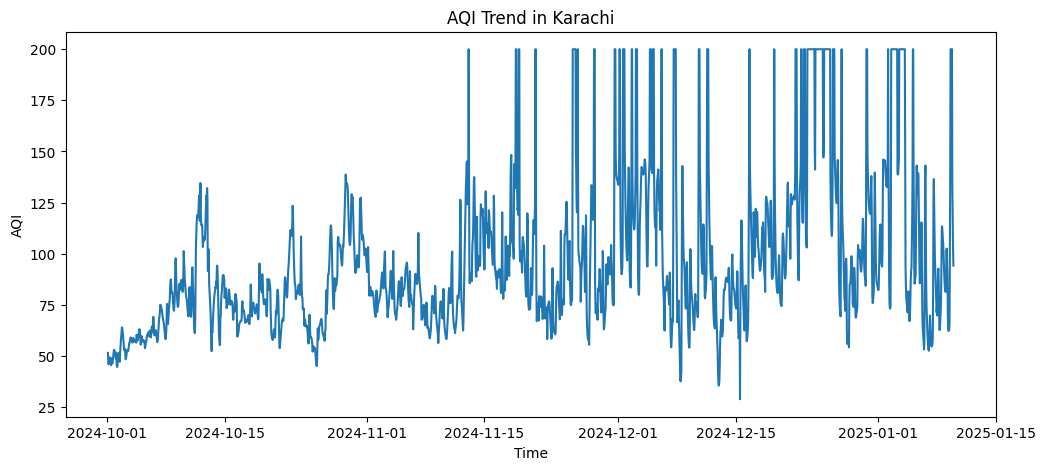

In [5]:
import matplotlib.pyplot as plt

df.sort_values("timestamp", inplace=True)

plt.figure(figsize=(12,5))
plt.plot(df["timestamp"], df["aqi"])
plt.title("AQI Trend in Karachi")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.show()


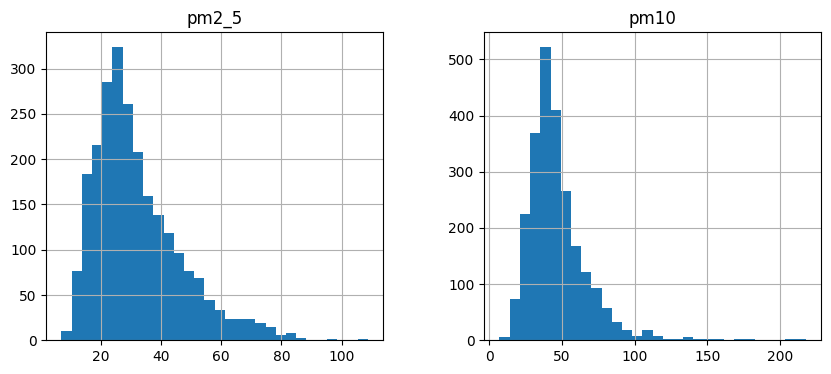

In [6]:
df[["pm2_5", "pm10"]].hist(bins=30, figsize=(10,4))
plt.show()


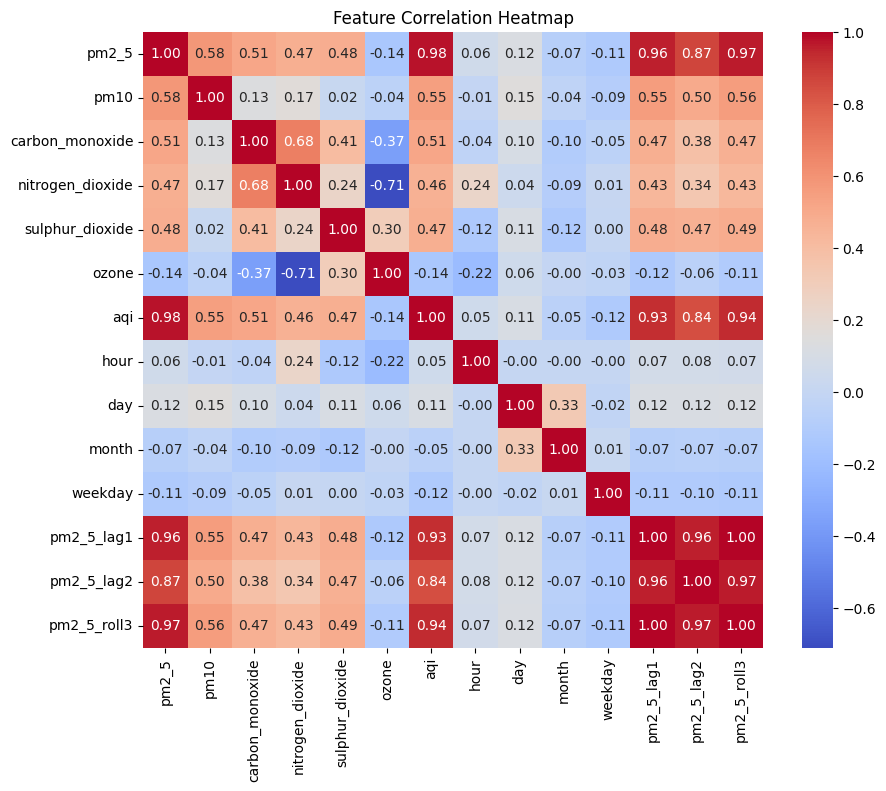

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

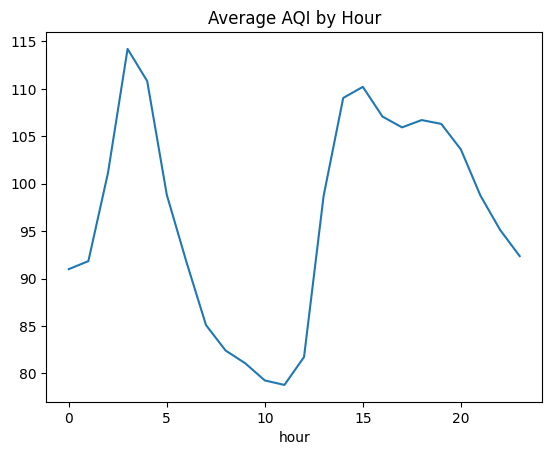

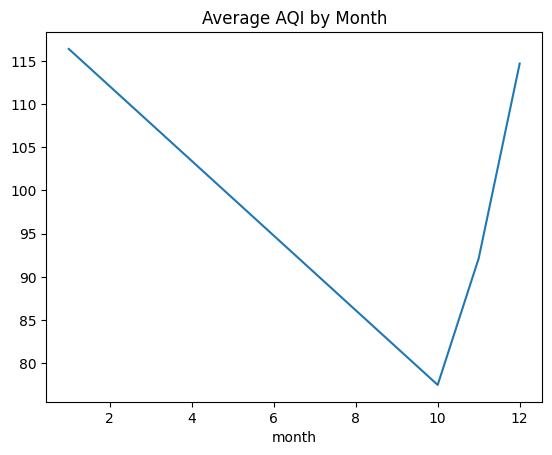

In [10]:
df.groupby("hour")["aqi"].mean().plot(title="Average AQI by Hour")
plt.show()

df.groupby("month")["aqi"].mean().plot(title="Average AQI by Month")
plt.show()


In [ ]:
import hopsworks
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()


In [ ]:
project = hopsworks.login(
    project=os.getenv("HOPSWORKS_PROJECT"),
    api_key_value=os.getenv("HOPSWORKS_API_KEY")
)

fs = project.get_feature_store()
